<a href="https://colab.research.google.com/github/descandon88/Analisis-de-datos-social/blob/main/Ejercicios_Grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
import numpy as np
import pandas as pd

In [3]:
!pip install scikit-network

     |████████████████████████████████| 8.4MB 4.7MB/s 
     |████████████████████████████████| 27.4MB 129kB/s 
     |████████████████████████████████| 15.3MB 330kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [1]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.topology import connected_components
from sknetwork.visualization import svg_graph, svg_digraph, svg_bigraph
from sknetwork.utils.format import bipartite2undirected
from IPython.display import SVG

In [2]:
from google.colab import drive
# Permiso para acceder a drive desde colab
drive.mount("/content/drive")

Mounted at /content/drive


In [7]:
df_tweets=pd.read_csv('/content/drive/My Drive/ADS/tweets.csv')
df_tweets.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
0,69139927,AldoLema_uy,1387747570508877825,Durante el primer trimestre se mantuvo el dina...,2021-04-29 12:36:18,9,2,NaN,NaN,NaN
1,69139927,AldoLema_uy,1387722124454891525,Respecto a la relación de Biden y los demócrat...,2021-04-29 10:55:11,2,0,NaN,NaN,NaN
2,69139927,AldoLema_uy,1387717584854921222,A 100 días de haber asumido y tras su discurso...,2021-04-29 10:37:09,3,0,NaN,NaN,NaN
3,69139927,AldoLema_uy,1387702441420935171,La empresa uruguaya de pagos @dLocalPayments s...,2021-04-29 09:36:58,4,0,NaN,NaN,NaN
4,69139927,AldoLema_uy,1387687245008752645,La cadena cárnica uruguaya pagó US$ 198 millon...,2021-04-29 08:36:35,24,10,NaN,NaN,NaN


In [8]:
!pip install networkx
!pip install bokeh
!pip install kora
!pip install pandas-bokeh
!pip install fiona


     |████████████████████████████████| 61kB 2.9MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 15.3MB 324kB/s 


In [9]:
import networkx as nx

#G = nx.Graph()

In [28]:
## Elimino las celdas vacías y lo agrego a un dataframe nuevo df1
df1 = df_tweets
df1 = df1.dropna()
df1.head()

,user_id_tw,user_id,tweet_id,text,date,likes,rts,respuesta_a_tweet_id,respuesta_a_user_id,respuesta_a_user_screen_name
13,69139927,AldoLema_uy,1387536693343965190,"Con 2.497 fallecidos totales, 2.939 casos hoy,...",2021-04-28 22:38:21,8,6,1.387535e+18,69139927.0,AldoLema_uy
27,69139927,AldoLema_uy,1387176212674535432,"Con 2.452 fallecidos totales, 2.769 casos hoy,...",2021-04-27 22:45:56,2,1,1.387173e+18,69139927.0,AldoLema_uy
36,69139927,AldoLema_uy,1387040282999283718,@mrodrigfeed Me imaginaba que era 1986: U2 en ...,2021-04-27 13:45:48,3,0,1.387040e+18,568490386.0,mrodrigfeed
37,69139927,AldoLema_uy,1387038518992457736,@mrodrigfeed 20 de setiembre de 198_?,2021-04-27 13:38:47,3,0,1.387037e+18,568490386.0,mrodrigfeed
39,69139927,AldoLema_uy,1386993433575821313,@JavierdeHaedo De acuerdo que no era serio. Pe...,2021-04-27 10:39:38,11,1,1.386990e+18,356460604.0,JavierdeHaedo


In [23]:
G = nx.from_pandas_edgelist(df1, 'user_id', 'respuesta_a_user_screen_name', 'likes')

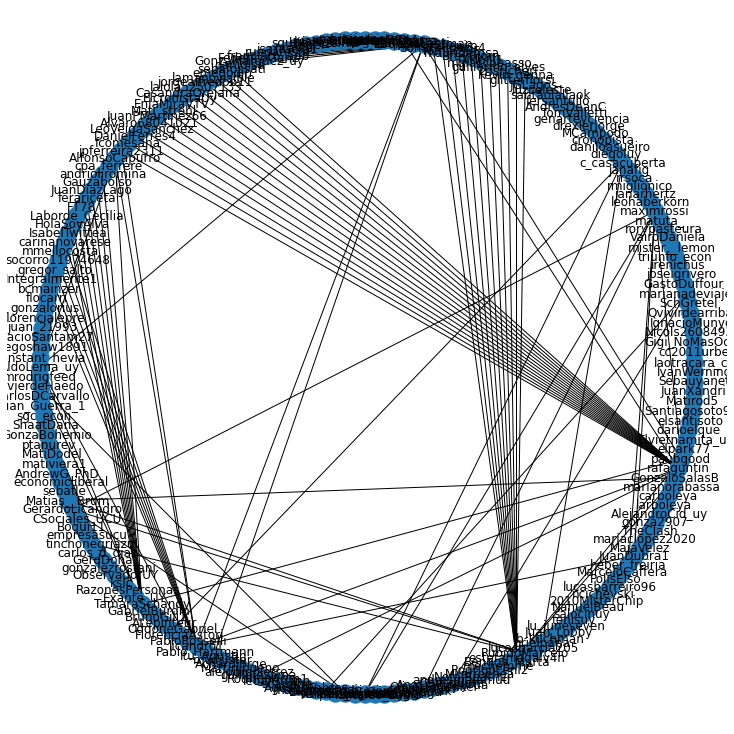

In [29]:
## con el draw_shell aprecio los nodos de mayor interacción

from matplotlib.pyplot import figure
figure(figsize=(10, 10)) ## intentar con 25, 22
nx.draw_shell(G, with_labels=True)

In [30]:
import community
import networkx.algorithms.community as nxcom


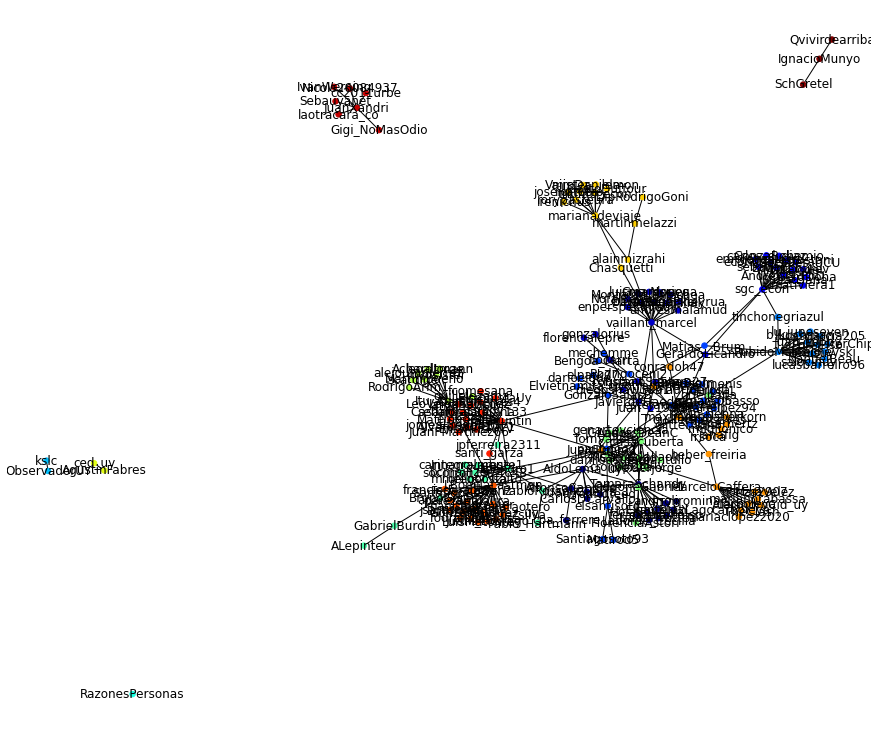

In [31]:
nx.transitivity(G)
pos = nx.spring_layout(G,scale=2)
#find modularity
part = community.best_partition(G)
mod = community.modularity(part,G)

#plot, color nodes using community structure
values = [part.get(node) for node in G.nodes()]
figure(figsize=(12, 10))

nx.draw_spring(G, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=True)
#plt.figure(3,figsize=(12,12)) 
plt.show()
#nx.draw(G,pos)

In [35]:
from bokeh.io import output_notebook, show, save

from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx

In [33]:
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
import json
import pandas_bokeh
from bokeh.models import HoverTool
from bokeh.models import CustomJS
from bokeh.palettes import RdYlBu11 as palette
from bokeh.models import LogColorMapper
from bokeh.models import GraphRenderer
import math


In [38]:
#Choose a title!
title = 'Grafos de interacciones de Economistas de Uruguay'
#G = nx.from_pandas_edgelist(df1, 'user_id', 'respuesta_a_user_screen_name', 'likes')
#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [("Usuario", "@index")]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS, tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom', x_range=Range1d(-10.1, 10.1), y_range=Range1d(-10.1, 10.1), title=title)

#Create a network graph object with spring layout
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html

network_graph = from_networkx(G, nx.spring_layout, scale=15, center=(0, 0))

#Set node size and color
network_graph.node_renderer.glyph = Circle(size=15, fill_color='skyblue')

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

#Add network graph to the plot
plot.renderers.append(network_graph)

output_notebook()

show(plot)
#save(plot,filename="interactive_graphs.html")

#save(plot, filename=f"{title}.html")

In [67]:
import networkx as nx

from bokeh.io import output_file, show
from bokeh.models import (BoxSelectTool, Circle, EdgesAndLinkedNodes, HoverTool,
                          MultiLine, NodesAndLinkedEdges, Plot, Range1d, TapTool,)
from bokeh.palettes import Spectral4
from bokeh.plotting import from_networkx

#G=nx.karate_club_graph()

plot = Plot(plot_width=1000, plot_height=1000,
            x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))
plot.title.text = "Graph Interaction Demonstration"

HOVER_TOOLTIPS = [("Usuario", "@index"),("Likes", "@likes")]

plot.add_tools(HoverTool(tooltips=HOVER_TOOLTIPS), TapTool(), BoxSelectTool())

graph_renderer = from_networkx(G, nx.circular_layout, scale=1, center=(0,0))

graph_renderer.node_renderer.glyph = Circle(size=15, fill_color=Spectral4[0])
graph_renderer.node_renderer.selection_glyph = Circle(size=15, fill_color=Spectral4[2])
graph_renderer.node_renderer.hover_glyph = Circle(size=15, fill_color=Spectral4[1])

graph_renderer.edge_renderer.glyph = MultiLine(line_color="#CCCCCC", line_alpha=0.8, line_width=5)
graph_renderer.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph_renderer.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph_renderer.selection_policy = NodesAndLinkedEdges()
graph_renderer.inspection_policy = EdgesAndLinkedNodes()

plot.renderers.append(graph_renderer)
output_notebook()

#output_file("interactive_graphs.html")
show(plot)

In [51]:
from bokeh.io import output_notebook, show, save
from bokeh.models import Range1d, Circle, ColumnDataSource, MultiLine
from bokeh.plotting import figure
from bokeh.plotting import from_networkx
from bokeh.palettes import Blues8, Reds8, Purples8, Oranges8, Viridis8, Spectral8
from bokeh.transform import linear_cmap

In [54]:
degrees = dict(nx.degree(G))
nx.set_node_attributes(G, name='degree', values=degrees)

In [56]:
number_to_adjust_by = 5
adjusted_node_size = dict([(node, degree+number_to_adjust_by) for node, degree in nx.degree(G)])
nx.set_node_attributes(G, name='adjusted_node_size', values=adjusted_node_size)

In [68]:
#Choose attributes from G network to size and color by — setting manual size (e.g. 10) or color (e.g. 'skyblue') also allowed
size_by_this_attribute = 'adjusted_node_size'
color_by_this_attribute = 'adjusted_node_size'

#Pick a color palette — Blues8, Reds8, Purples8, Oranges8, Viridis8
color_palette = Blues8

#Choose a title!
title = 'Grafos con Varacion de tamaño en los Nodos'

#Establish which categories will appear when hovering over each node
HOVER_TOOLTIPS = [
       ("Cuenta", "@index"),
        ("Likes", "@degree")
]

#Create a plot — set dimensions, toolbar, and title
plot = figure(tooltips = HOVER_TOOLTIPS,
              tools="pan,wheel_zoom,save,reset", active_scroll='wheel_zoom',
            x_range=Range1d(-15.1, 15.1), y_range=Range1d(-15.1, 15.1), title=title)

#Create a network graph object
# https://networkx.github.io/documentation/networkx-1.9/reference/generated/networkx.drawing.layout.spring_layout.html\
network_graph = from_networkx(G, nx.spring_layout, scale=10, center=(0, 0))

#Set node sizes and colors according to node degree (color as spectrum of color palette)
minimum_value_color = min(network_graph.node_renderer.data_source.data[color_by_this_attribute])
maximum_value_color = max(network_graph.node_renderer.data_source.data[color_by_this_attribute])
network_graph.node_renderer.glyph = Circle(size=size_by_this_attribute, fill_color=linear_cmap(color_by_this_attribute, color_palette, minimum_value_color, maximum_value_color))

#Set edge opacity and width
network_graph.edge_renderer.glyph = MultiLine(line_alpha=0.5, line_width=1)

plot.renderers.append(network_graph)
output_notebook()

show(plot)
#save(plot, filename=f"{title}.html")

In [ ]:
len(G['JavierdeHaedo'])


9

In [ ]:
len(G['licandro1'])


14

In [ ]:
tmp = {}
for x in G.nodes:
 tmp[x] = len(G[x])
s = pd.Series(tmp, name='connections')
df2 = s.to_frame().sort_values('connections', ascending=False)

In [ ]:
df2.head(5)

,connections
LBonillaLastman,24
rafaguntin,21
vaillant_marcel,18
sgc_econ,17
RubidoMarcelo,16
